In [4]:
import numpy as np
import pandas as pd
import scipy
import scipy.signal as signal

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ir = np.loadtxt("ir20201022_sekiguchi.log")[50:-50]
ir.shape, ir

((27124,), array([134025., 134096., 134177., ..., 132812., 132908., 132996.]))

In [6]:
red = np.loadtxt("red20201022_sekiguchi.log")[50:-50]
red.shape, red

((27124,), array([122814., 122955., 123101., ..., 120486., 120654., 120831.]))

In [7]:
print((ir.shape[0] // 25) / 60, "s")

18.066666666666666 s


# Sampling rate 25Hz
# record time 18 minutes

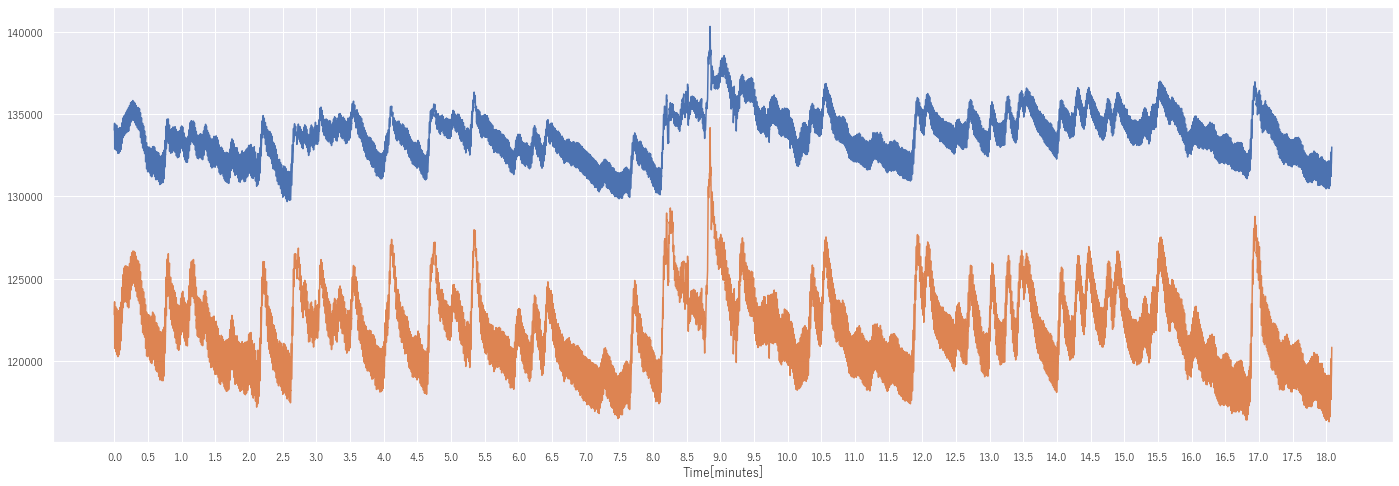

In [8]:
tt = np.linspace(0, ir.shape[0] / 25 / 60, ir.shape[0])
plt.figure(figsize=(24, 8))
plt.plot(tt, ir)
plt.plot(tt, red)
plt.xticks(np.arange(0, ir.shape[0] / 25 / 60, 0.5))
plt.xlabel("Time[minutes]")
plt.ylabel("")
plt.show()

In [20]:
Frequency = 25
# firフィルタを適用する
def firFilter(x):
    # fir filter
    b = signal.firwin(255, [0.5, 12.0], fs=Frequency, pass_zero=False) # 1.5Hz ~ 12.0Hzのバンドパスフィルタ
    x = signal.filtfilt(b, 1, x)
    return x

In [21]:
ir_filter = firFilter(ir)
red_filter = firFilter(red)

ir_filter.shape, red_filter.shape

((27124,), (27124,))

## バンドパスフィルタ適用後の波形を表示
### x軸は0.5minutesごとに数字を表示

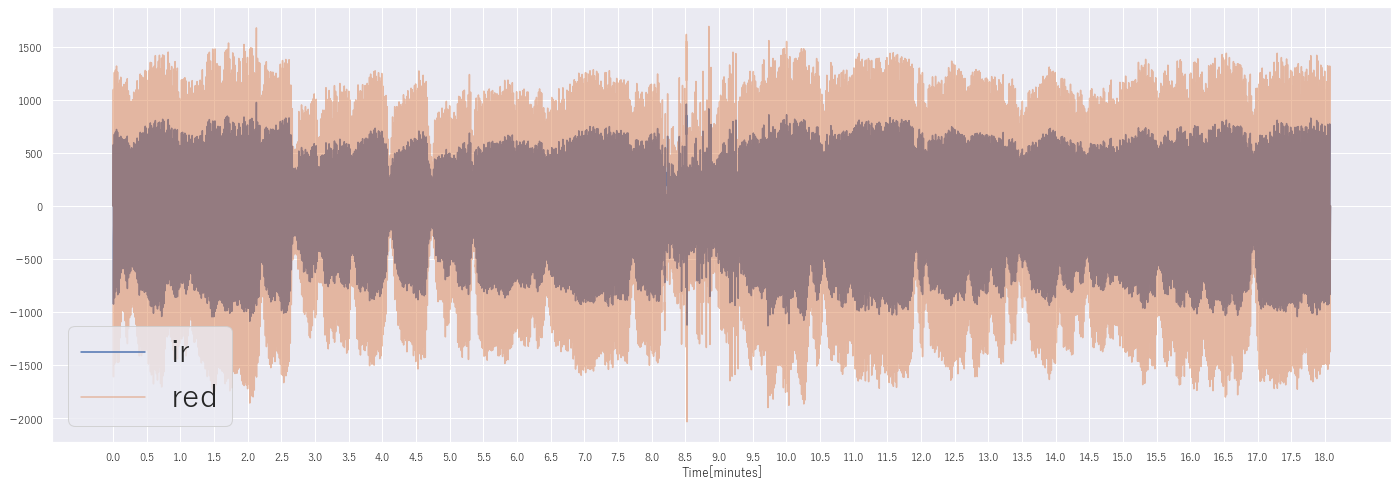

In [30]:
tt = np.linspace(0, ir.shape[0] / 25 / 60, ir.shape[0])
plt.figure(figsize=(24, 8))
plt.plot(tt, ir_filter, label='ir')
plt.plot(tt, red_filter, label='red', alpha=0.5)
plt.xticks(np.arange(0, ir.shape[0] / 25 / 60, 0.5))
plt.xlabel("Time[minutes]")
plt.ylabel("")
plt.legend(fontsize=32)
plt.show()

## 休憩中？の波形を表示

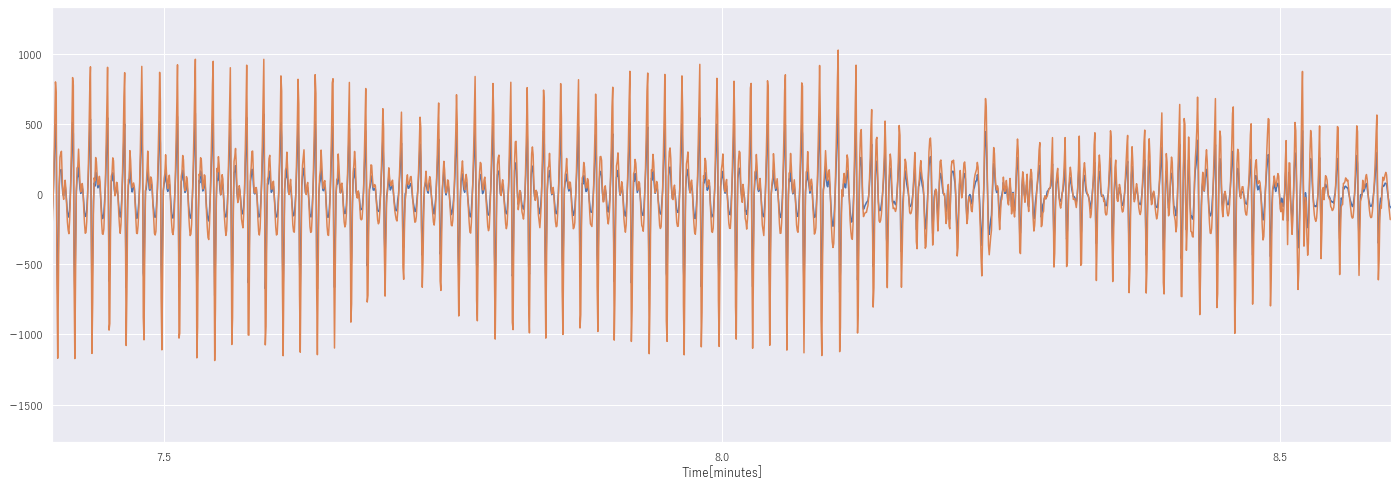

In [12]:
tt = np.linspace(0, ir.shape[0] / 25 / 60, ir.shape[0])
plt.figure(figsize=(24, 8))
plt.plot(tt, ir_filter)
plt.plot(tt, red_filter)
plt.xticks(np.arange(0, ir.shape[0] / 25 / 60, 0.5))
plt.xlabel("Time[minutes]")
plt.ylabel("")
plt.xlim(7.4, 8.6)
plt.show()

## 時間周波数解析

In [35]:
nfft = 256
overlap = 16
def time_frequency(x):
    f, t, x = signal.spectrogram(x, fs=25, nfft=nfft, nperseg=nfft, noverlap=overlap)
#     x = (x - x.mean()) / x.std()
    x = np.log1p(x)
    return f, t, x

In [36]:
f, t, ir_tf = time_frequency(ir)
ir_tf.shape

(129, 112)

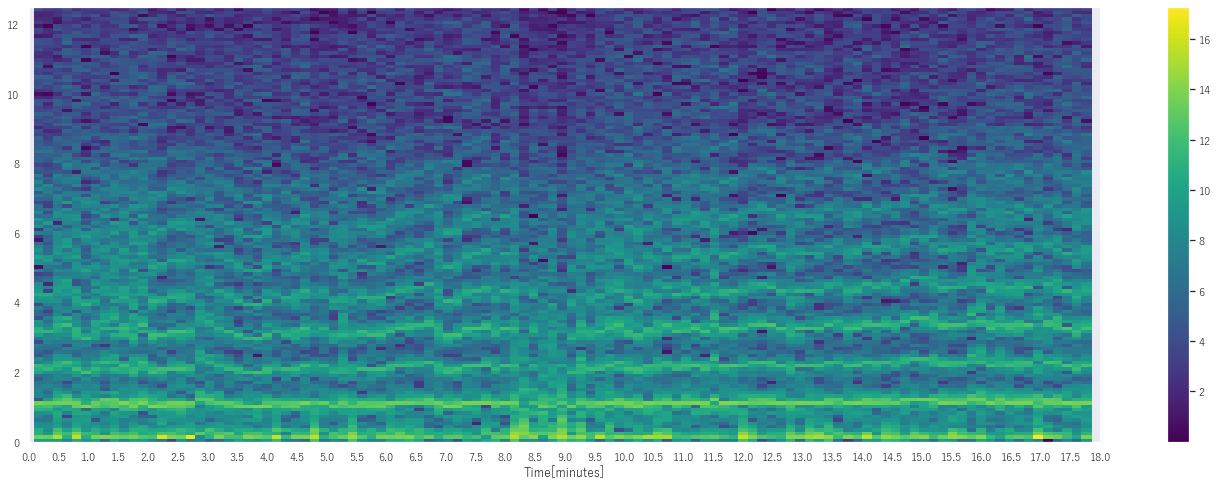

In [37]:
plt.figure(figsize=(24, 8))
plt.rcParams['image.cmap'] = 'viridis'
plt.pcolormesh(t / 60, f, ir_tf)
plt.xlabel("Time[minutes]")
plt.xticks(np.arange(0, (ir.shape[0] // 25) / 60, 0.5))
plt.colorbar()
plt.show()

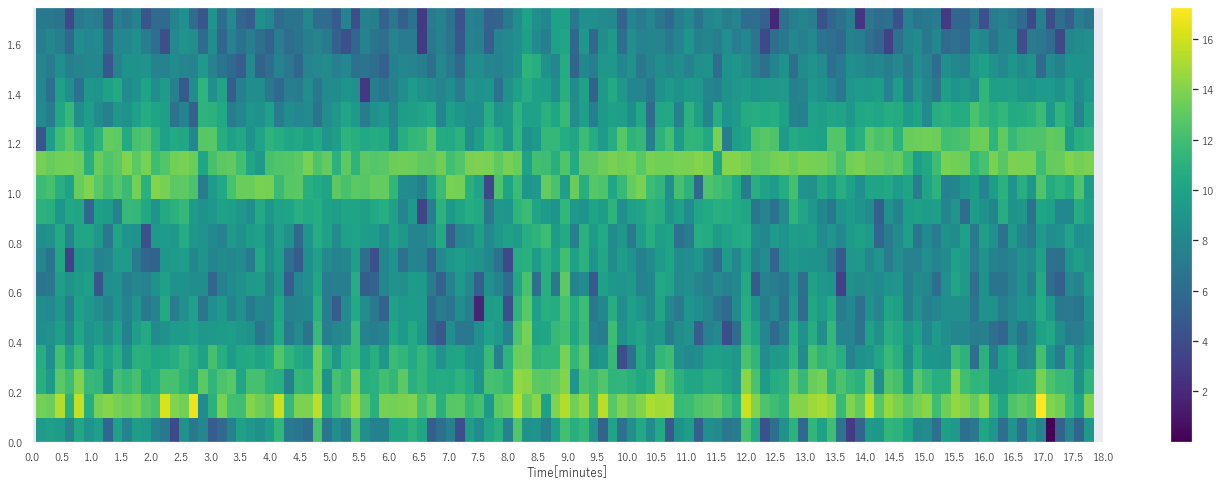

In [38]:
plt.figure(figsize=(24, 8))
plt.rcParams['image.cmap'] = 'viridis'
plt.pcolormesh(t / 60, f, ir_tf)
plt.xlabel("Time[minutes]")
plt.xticks(np.arange(0, (ir.shape[0] // 25) / 60, 0.5))
plt.colorbar()
plt.ylim(0, 1.75)
plt.show()

## 心拍数のピーク値の抽出

(7.5, 8.0)

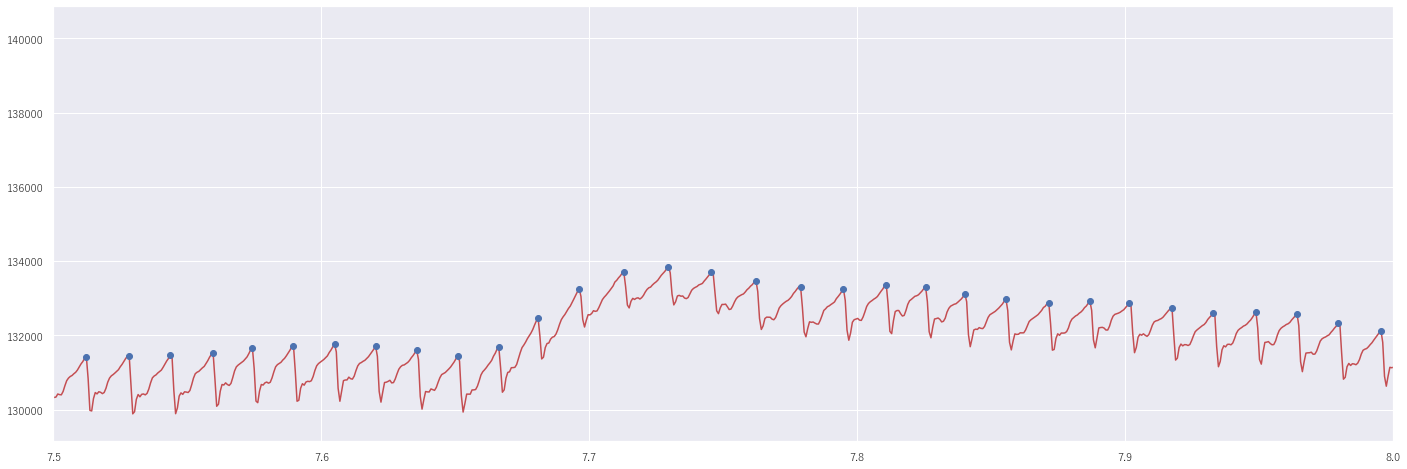

In [17]:
tt = np.linspace(0, ir.shape[0] / 25 / 60, ir.shape[0])

maxid = signal.argrelmax(ir, order=5)

plt.figure(figsize=(24, 8))
plt.plot(tt, ir, 'r')
plt.plot(tt[maxid], ir[maxid], 'bo')
plt.xlim(7.5, 8.0)

## ピークのインデックスの差異行列を作成
## サンプリング周期を”なるべく”irセンサと同じ25Hzに合わせる

In [18]:
hr = 60 / (np.diff(maxid) / 25)
hr = hr.reshape([hr.shape[1]])
hr = np.repeat(hr, 23)
hr.shape, hr

((27094,),
 array([65.2173913 , 65.2173913 , 65.2173913 , ..., 68.18181818,
        68.18181818, 68.18181818]))

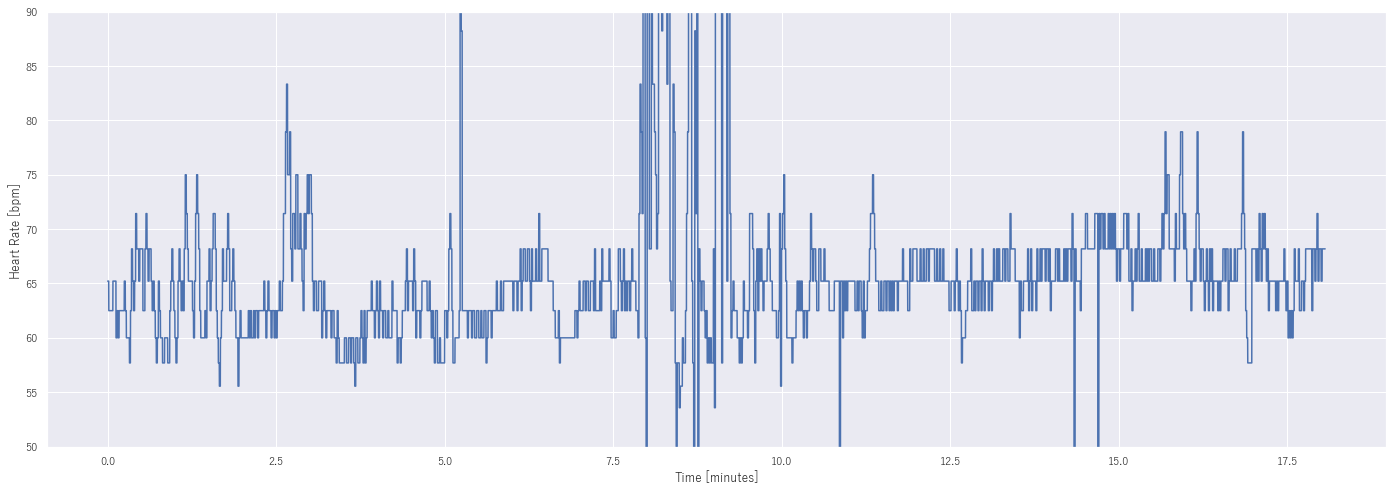

In [19]:
tt = np.linspace(0, hr.shape[0] / 25 / 60, hr.shape[0])
plt.figure(figsize=(24, 8))
plt.plot(tt, hr)
plt.ylim(50, 90)
plt.xlabel("Time [minutes]")
plt.ylabel("Heart Rate [bpm]")
plt.show()